# Toolkit

In [149]:
import pandas as pd
import numpy as np

import seaborn as sns

from datasist.structdata import detect_outliers

from scipy.stats import pointbiserialr
import category_encoders as ce

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction import FeatureHasher

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier

from sklearn.metrics import classification_report, r2_score, precision_score, recall_score
import joblib

# Import and Inspect data

In [101]:
pd.set_option('display.max_columns', 30) 
df = pd.read_csv(r"Data/advertising.csv")
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [102]:
# random sample
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
195,71.86,32,51633.34,116.53,Face-to-face even-keeled website,Kentmouth,0,Senegal,2016-05-17 06:14:20,1
574,46.66,45,49101.67,118.16,Grass-roots mission-critical emulation,Wrightview,0,Antigua and Barbuda,2016-03-09 02:07:17,1
310,76.56,34,70179.11,221.53,Universal bi-directional extranet,Jeremyshire,1,Dominica,2016-04-23 08:15:31,0
820,57.51,38,47682.28,105.71,Re-engineered zero-defect open architecture,Jeffreymouth,0,Moldova,2016-03-31 08:53:43,1
150,58.18,25,69112.84,176.28,Polarized analyzing concept,Tinachester,1,New Zealand,2016-02-10 06:37:56,0
493,59.70,28,49158.50,120.25,Expanded zero administration attitude,Florestown,0,Guernsey,2016-05-10 14:12:31,1
866,86.58,32,60151.77,195.93,Business-focused asynchronous budgetary manage...,Henryfort,1,Mexico,2016-02-26 23:44:44,0
27,51.95,52,58295.82,129.23,Monitored systematic hierarchy,South Cathyfurt,0,Greece,2016-07-19 08:32:10,1
438,57.64,36,37212.54,110.25,Robust web-enabled attitude,North Maryland,1,Chile,2016-01-18 15:18:01,1
748,45.11,58,39799.73,195.69,Sharable reciprocal project,Browntown,0,Netherlands,2016-01-05 16:26:44,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [104]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Preprocessing

### Duplicates

In [105]:
df.duplicated().sum()

0

### Nulls

In [106]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Explore each column

In [107]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [108]:
df['Daily Time Spent on Site'].unique().tolist()

[68.95,
 80.23,
 69.47,
 74.15,
 68.37,
 59.99,
 88.91,
 66.0,
 74.53,
 69.88,
 47.64,
 83.07,
 69.57,
 79.52,
 42.95,
 63.45,
 55.39,
 82.03,
 54.7,
 74.58,
 77.22,
 84.59,
 41.49,
 87.29,
 41.39,
 78.74,
 48.53,
 51.95,
 70.2,
 76.02,
 67.64,
 86.41,
 59.05,
 55.6,
 57.64,
 84.37,
 62.26,
 65.82,
 50.43,
 38.93,
 84.98,
 64.24,
 82.52,
 81.38,
 80.47,
 37.68,
 69.62,
 85.4,
 44.33,
 48.01,
 73.18,
 79.94,
 33.33,
 50.33,
 62.31,
 80.6,
 65.19,
 44.98,
 77.63,
 41.82,
 85.61,
 85.84,
 72.08,
 86.06,
 45.96,
 62.42,
 63.89,
 35.33,
 75.74,
 78.53,
 46.13,
 69.01,
 55.35,
 33.21,
 38.46,
 64.1,
 49.81,
 82.73,
 56.14,
 55.13,
 78.11,
 73.46,
 56.64,
 68.94,
 70.79,
 57.76,
 77.51,
 52.7,
 57.7,
 56.89,
 69.9,
 55.79,
 70.03,
 50.08,
 43.67,
 72.84,
 45.72,
 39.94,
 35.61,
 79.71,
 63.6,
 89.91,
 68.18,
 66.49,
 80.49,
 72.23,
 42.39,
 47.53,
 74.02,
 66.63,
 63.24,
 71.0,
 69.0,
 76.99,
 72.6,
 61.88,
 84.45,
 88.97,
 86.19,
 49.58,
 77.65,
 37.75,
 62.33,
 79.57,
 80.31,
 89.05,
 70.41

In [109]:
df['Age'].value_counts()

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

In [110]:
df['Area Income'].unique()

array([61833.9 , 68441.85, 59785.94, 54806.18, 73889.99, 59761.56,
       53852.85, 24593.33, 68862.  , 55642.32, 45632.51, 62491.01,
       51636.92, 51739.63, 30976.  , 52182.23, 23936.86, 71511.08,
       31087.54, 23821.72, 64802.33, 60015.57, 32635.7 , 61628.72,
       68962.32, 64828.  , 38067.08, 58295.82, 32708.94, 46179.97,
       51473.28, 45593.93, 25583.29, 30227.98, 45580.92, 61389.5 ,
       56770.79, 76435.3 , 57425.87, 27508.41, 57691.95, 59784.18,
       66572.39, 64929.61, 57519.64, 53575.48, 50983.75, 67058.72,
       52723.34, 54286.1 , 61526.25, 58526.04, 53350.11, 62657.53,
       62722.57, 67479.62, 75254.88, 52336.64, 56113.37, 24852.9 ,
       47708.42, 64654.66, 71228.44, 61601.05, 66281.46, 73910.9 ,
       51317.33, 51510.18, 61005.87, 32536.98, 60248.97, 74543.81,
       75509.61, 42650.32, 58183.04, 60465.72, 57009.76, 54541.56,
       32689.04, 55605.92, 63296.87, 65653.47, 61652.53, 30726.26,
       74535.94, 47861.93, 73600.28, 58543.94, 42696.67, 37334

In [111]:
df['Daily Internet Usage'].unique()

array([256.09, 193.77, 236.5 , 245.89, 225.58, 226.74, 208.36, 131.76,
       221.51, 183.82, 122.02, 230.87, 113.12, 214.23, 143.56, 140.64,
       129.41, 187.53, 118.39, 135.51, 224.44, 226.54, 164.83, 209.93,
       167.22, 204.79, 134.14, 129.23, 119.2 , 209.82, 267.01, 207.48,
       169.23, 212.58, 133.81, 201.58, 125.45, 221.94, 119.32, 162.08,
       202.61, 252.36, 198.11, 212.3 , 204.86, 172.83, 202.25, 198.72,
       123.72, 119.93, 196.71, 225.29, 193.58, 133.2 , 119.3 , 177.55,
       150.61, 129.31, 239.22, 156.36, 183.43, 192.93, 169.5 , 178.92,
       141.22, 198.5 , 105.22, 200.22, 215.25, 131.72, 139.01, 222.63,
       153.17, 167.07, 145.98, 215.93, 120.06, 238.99, 113.53, 111.71,
       209.25, 222.75, 115.91, 138.71, 184.1 , 105.15, 200.55, 118.6 ,
       109.07, 109.29, 138.35, 149.67, 227.72, 125.85, 166.29, 238.63,
       154.02, 156.3 , 158.22, 211.65, 169.18, 235.28, 194.23, 218.17,
       202.16, 229.12, 241.03, 150.99, 135.18, 210.54, 176.98, 235.78,
      

In [112]:
df['Ad Topic Line'].nunique()

1000

In [113]:
df['City'].nunique()

969

In [114]:
df['Male'].unique()

array([0, 1], dtype=int64)

In [115]:
df['Country'].nunique()

237

In [116]:
df['Timestamp'].unique()

array(['2016-03-27 00:53:11', '2016-04-04 01:39:02',
       '2016-03-13 20:35:42', '2016-01-10 02:31:19',
       '2016-06-03 03:36:18', '2016-05-19 14:30:17',
       '2016-01-28 20:59:32', '2016-03-07 01:40:15',
       '2016-04-18 09:33:42', '2016-07-11 01:42:51',
       '2016-03-16 20:19:01', '2016-05-08 08:10:10',
       '2016-06-03 01:14:41', '2016-04-20 21:49:22',
       '2016-03-24 09:31:49', '2016-03-09 03:41:30',
       '2016-01-30 19:20:41', '2016-05-02 07:00:58',
       '2016-02-13 07:53:55', '2016-02-27 04:43:07',
       '2016-01-05 07:52:48', '2016-03-18 13:22:35',
       '2016-05-20 08:49:33', '2016-03-23 09:43:43',
       '2016-06-13 17:27:09', '2016-05-27 15:25:52',
       '2016-02-08 10:46:14', '2016-07-19 08:32:10',
       '2016-04-14 05:08:35', '2016-01-27 12:38:16',
       '2016-07-02 20:23:15', '2016-03-01 22:13:37',
       '2016-07-15 05:05:14', '2016-01-14 14:00:09',
       '2016-03-15 03:12:25', '2016-04-12 03:26:39',
       '2016-04-07 15:18:10', '2016-02-09 05:2

In [117]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

# Feature Engineering

In [118]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [119]:
# Extract the timestamp in seconds
df['Numeric_Timestamp'] = (df['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

In [120]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Numeric_Timestamp         1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


# EDA

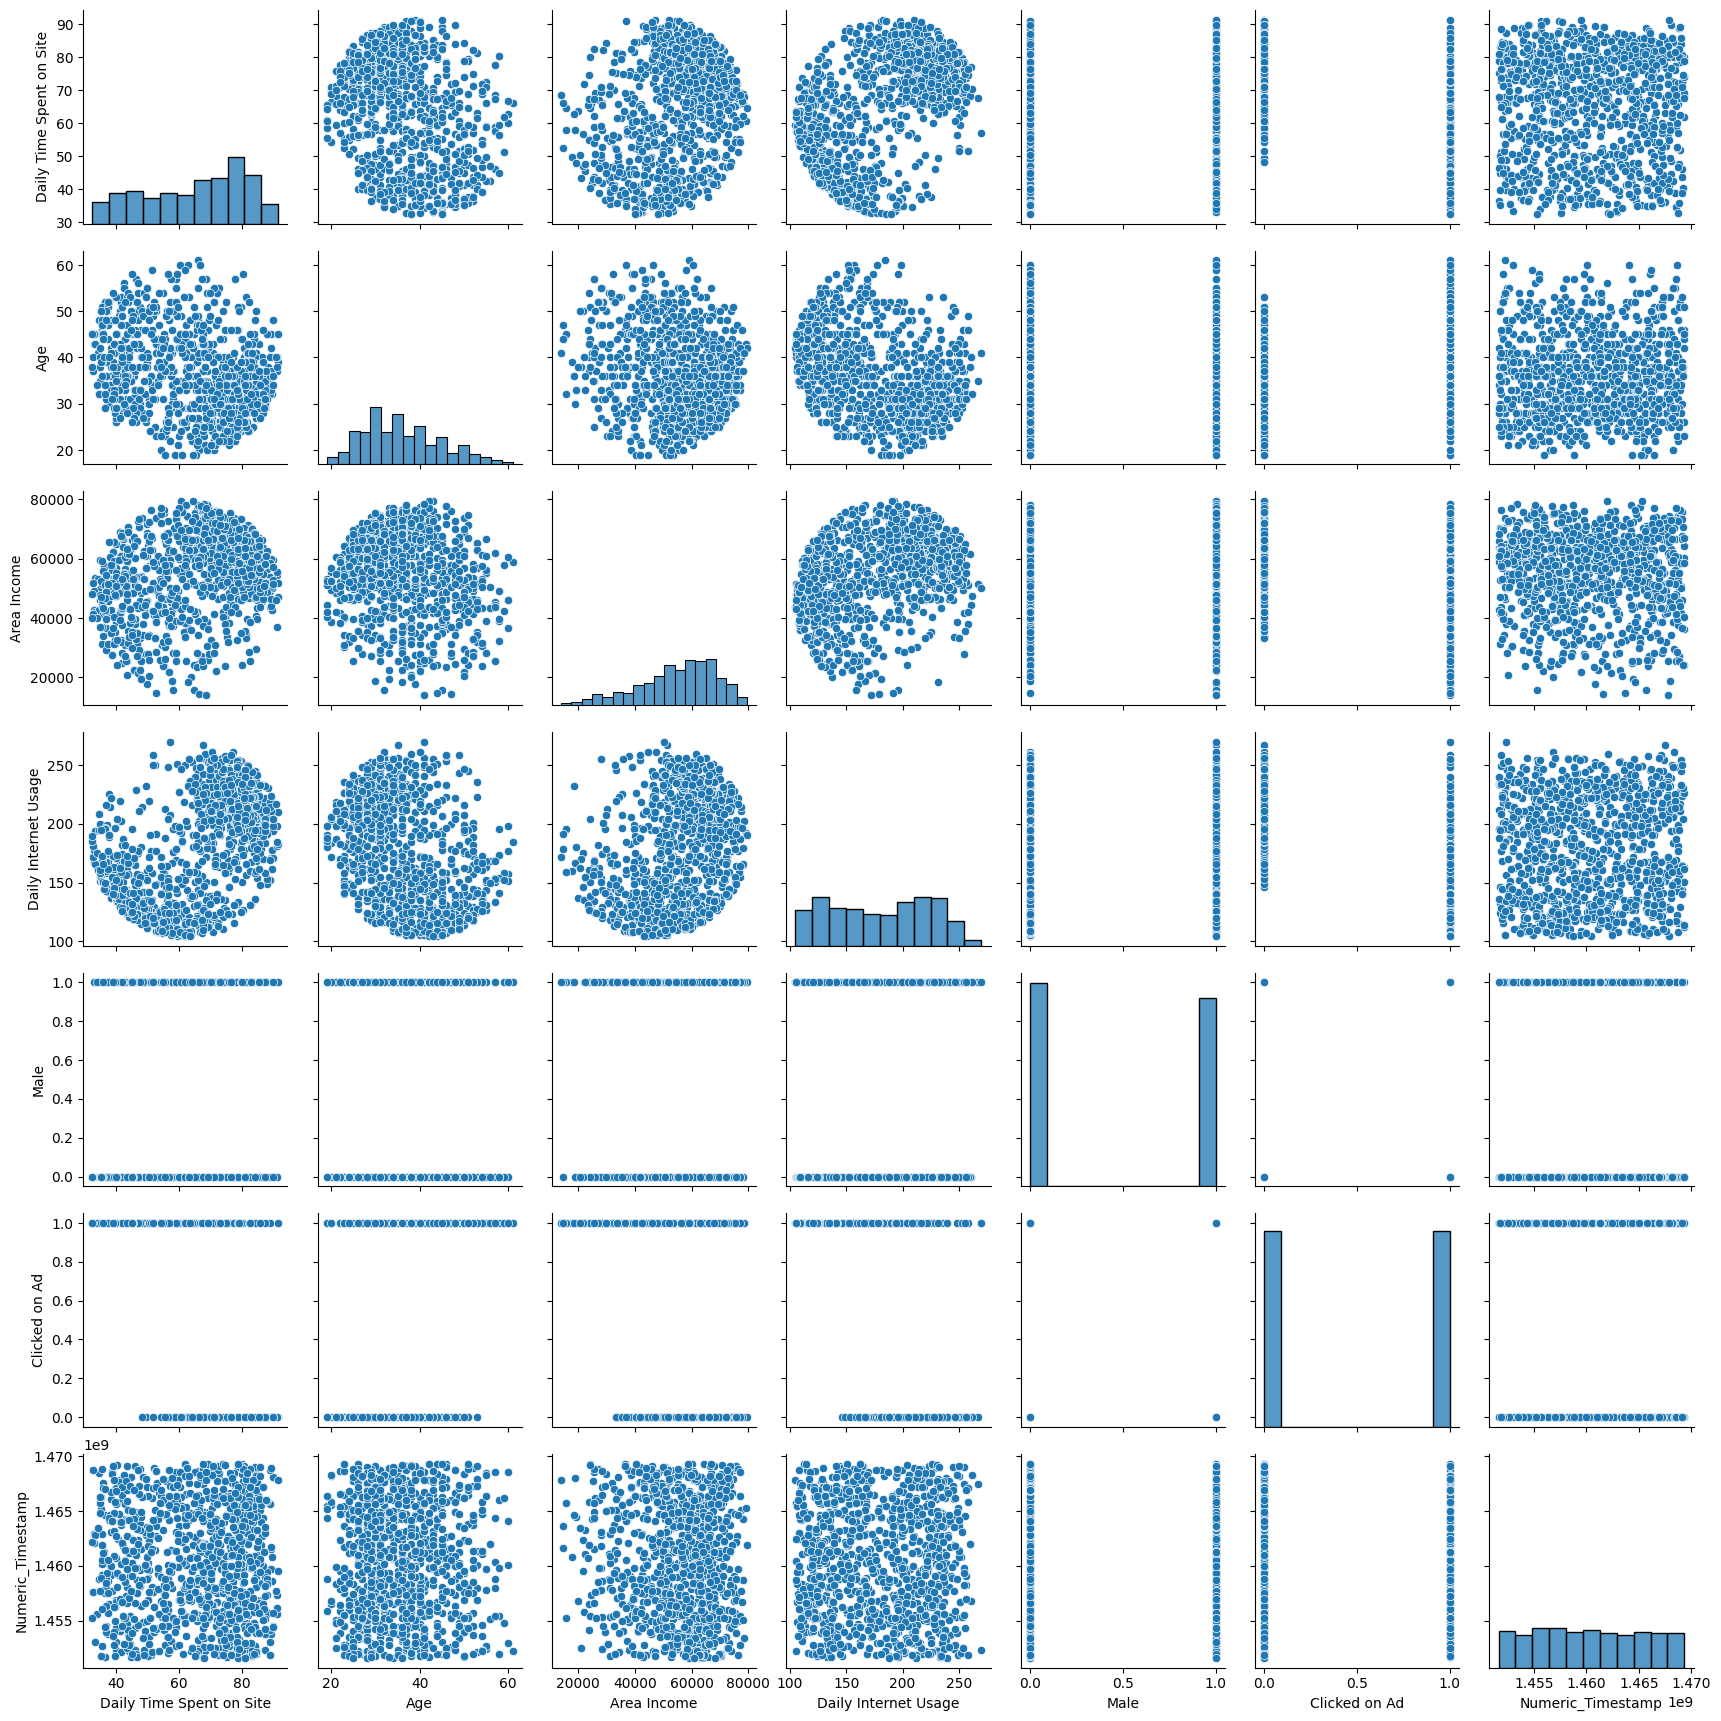

In [122]:
sns.pairplot(df)

C:\Users\shehab\AppData\Local\Temp\ipykernel_9168\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

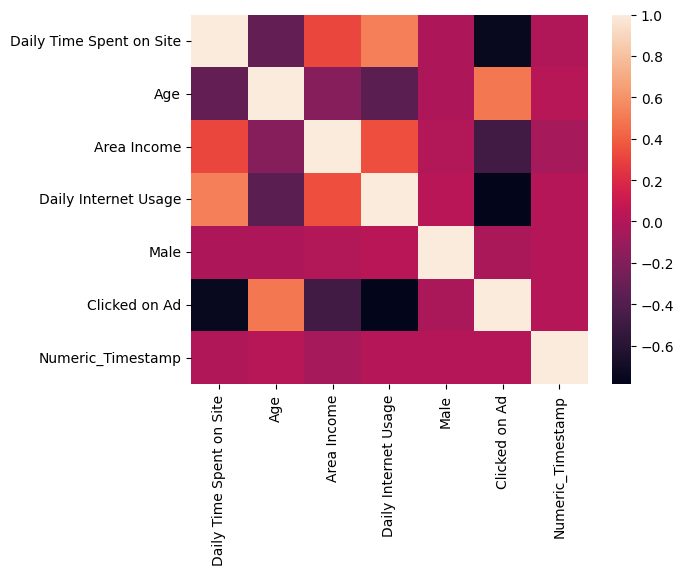

In [123]:
sns.heatmap(df.corr())

In [124]:
df.corr()["Clicked on Ad"]

C:\Users\shehab\AppData\Local\Temp\ipykernel_9168\368068066.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Clicked on Ad"]


Daily Time Spent on Site   -0.748117
Age                         0.492531
Area Income                -0.476255
Daily Internet Usage       -0.786539
Male                       -0.038027
Clicked on Ad               1.000000
Numeric_Timestamp           0.015056
Name: Clicked on Ad, dtype: float64

<Axes: xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

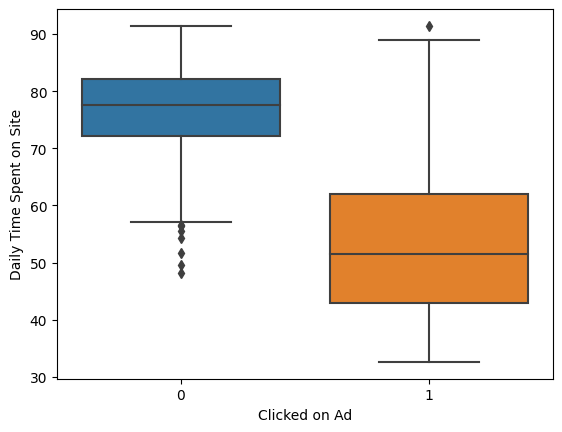

In [125]:
sns.boxplot(data=df, y='Daily Time Spent on Site', x='Clicked on Ad')

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

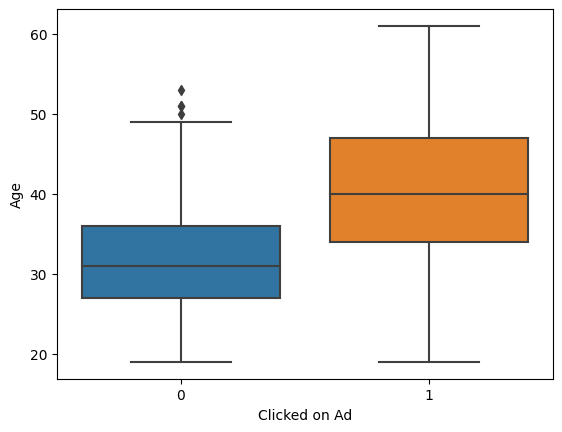

In [126]:
sns.boxplot(data=df, y='Age', x='Clicked on Ad')

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

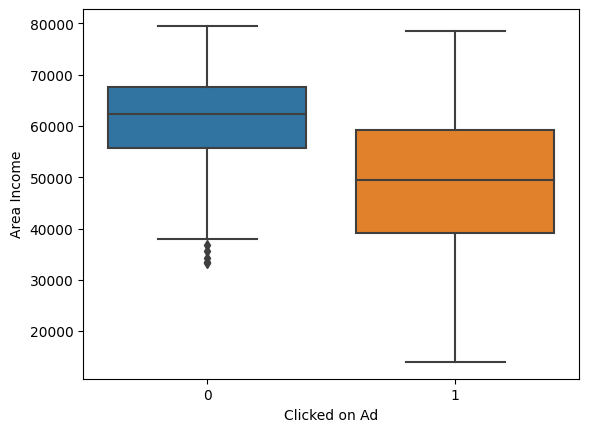

In [127]:
sns.boxplot(data=df, y='Area Income', x='Clicked on Ad')

<Axes: xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

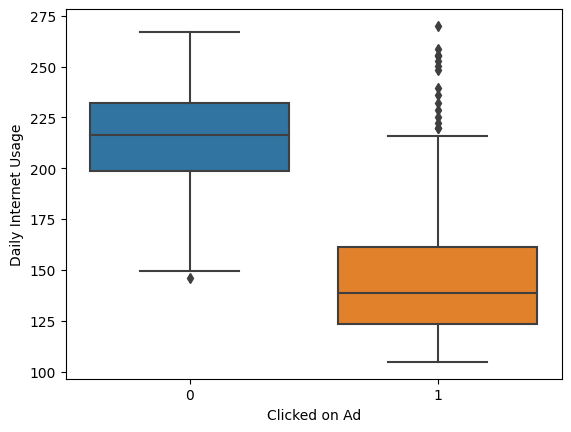

In [128]:
sns.boxplot(data=df, y='Daily Internet Usage', x='Clicked on Ad')

<Axes: xlabel='Clicked on Ad', ylabel='Male'>

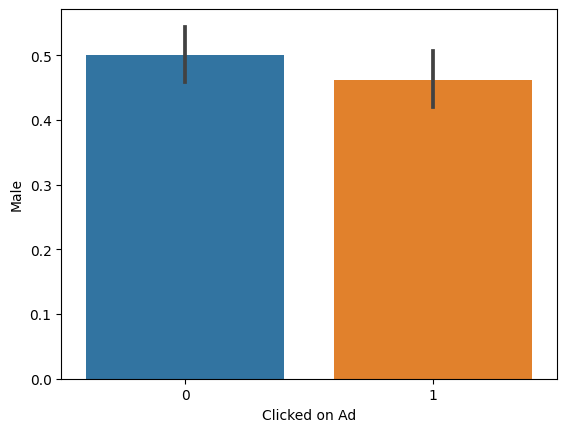

In [129]:
sns.barplot(data=df, y='Male', x='Clicked on Ad')

<Axes: xlabel='Clicked on Ad', ylabel='Numeric_Timestamp'>

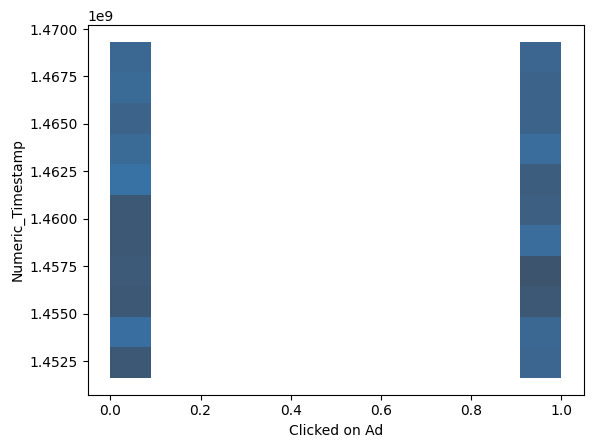

In [130]:
sns.histplot(data=df, y='Numeric_Timestamp', x='Clicked on Ad')

# Outliers

In [131]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [132]:
indices = detect_outliers(df, 0, numeric_columns)
(len(indices)/df.shape[0])*100

0.8999999999999999

In [133]:
# df.drop(indices, axis=0, inplace=True)

# Categorical correlation

In [134]:
# Calculate point biserial correlation coefficient
correlation_coefficient, _ = pointbiserialr(df['Ad Topic Line'].astype('category').cat.codes, df['Clicked on Ad'])

print(f"Point Biserial Correlation Coefficient: {correlation_coefficient}")

Point Biserial Correlation Coefficient: 0.02278687181781491


In [135]:
# Calculate point biserial correlation coefficient
correlation_coefficient, _ = pointbiserialr(df['City'].astype('category').cat.codes, df['Clicked on Ad'])

print(f"Point Biserial Correlation Coefficient: {correlation_coefficient}")

Point Biserial Correlation Coefficient: -0.007554485784190553


In [136]:
# Calculate point biserial correlation coefficient
correlation_coefficient, _ = pointbiserialr(df['Country'].astype('category').cat.codes, df['Clicked on Ad'])

print(f"Point Biserial Correlation Coefficient: {correlation_coefficient}")

Point Biserial Correlation Coefficient: 0.011414881777551714


In [137]:
# df.drop(['Ad Topic Line', 'City', 'Country'], axis=1, inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Numeric_Timestamp         1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


# Split

In [139]:
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Numeric_Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,1459039991
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,1459733942
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,1457901342
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1452393079
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,1464924978
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1455227340
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1461290821
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1454347497
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,1458786954


In [140]:
bin_enc= ce.BinaryEncoder()
x = bin_enc.fit_transform(x)
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line_0,Ad Topic Line_1,Ad Topic Line_2,Ad Topic Line_3,Ad Topic Line_4,Ad Topic Line_5,Ad Topic Line_6,Ad Topic Line_7,Ad Topic Line_8,Ad Topic Line_9,City_0,...,City_5,City_6,City_7,City_8,City_9,Male,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Numeric_Timestamp
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1459039991
1,80.23,31,68441.85,193.77,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1459733942
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1457901342
3,74.15,29,54806.18,245.89,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1452393079
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1464924978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,1,1,1,0,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,1,0,1,1,1,1455227340
996,51.30,45,67782.17,134.42,1,1,1,1,1,0,0,1,0,1,1,...,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1461290821
997,51.63,51,42415.72,120.37,1,1,1,1,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,1,1,0,1,1,0,1454347497
998,55.55,19,41920.79,187.95,1,1,1,1,1,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1458786954


In [141]:
# scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=24)

# Model

In [151]:
models={'LogisticRegression'  : LogisticRegression(),
        'KNN'                 : KNeighborsClassifier(n_neighbors=5),
        'SVC'                 : SVC(),
        'GN'                  : GaussianNB(),
        'DT'                  : DecisionTreeClassifier(),
        'RF'                  : RandomForestClassifier()}

In [152]:
for name, model in models.items():
    print('--------- ',name,'-------------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Train score:     ", model.score(x_train, y_train))
    print("Test score:      ", model.score(x_test, y_test))
    print('recall score:    ',recall_score(y_pred,y_test))
    print('precision score: ',precision_score(y_pred,y_test))
    print('_'*50)

---------  LogisticRegression -------------
Train score:      0.976
Test score:       0.96
recall score:     0.9612403100775194
precision score:  0.9612403100775194
__________________________________________________
---------  KNN -------------
Train score:      0.9293333333333333
Test score:       0.9
recall score:     0.9905660377358491
precision score:  0.813953488372093
__________________________________________________
---------  SVC -------------
Train score:      0.992
Test score:       0.96
recall score:     0.976
precision score:  0.9457364341085271
__________________________________________________
---------  GN -------------
Train score:      0.9653333333333334
Test score:       0.956
recall score:     0.9538461538461539
precision score:  0.9612403100775194
__________________________________________________
---------  DT -------------
Train score:      1.0
Test score:       0.948
recall score:     0.9393939393939394
precision score:  0.9612403100775194
______________________

# Bagging

In [153]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=tree, n_jobs=-1)
bagging.fit(x_train, y_train)
y_pred = bagging.predict(x_test)
print(f"train score: {bagging.score(x_train, y_train)}")
print(f"test score: {bagging.score(x_test, y_test)}")
print("R2",r2_score(y_test, y_pred) )

train score: 0.9973333333333333
test score: 0.952
R2 0.8078031904670382


C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Voting

### Hard

In [156]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True)
clf4 = DecisionTreeClassifier()
clf5 = RandomForestClassifier()
clf6 = GaussianNB()

vclf = VotingClassifier(estimators=[('lor', clf1), ('knn', clf2), ('svc', clf3), 
                                    ('DT', clf4), ('RF', clf5), ('GN', clf6)], voting="hard")

vclf.fit(x_train, y_train)

y_pred = vclf.predict(x_test)
print(f"train score: {vclf.score(x_train, y_train)}")
print(f"test score: {vclf.score(x_test, y_test)}")
print("R2",r2_score(y_test, y_pred) )

train score: 0.988
test score: 0.96
R2 0.8398359920558651


### Soft

In [157]:
vclf = VotingClassifier(estimators=[('lor', clf1), ('knn', clf2), ('svc', clf3), 
                                    ('DT', clf4), ('RF', clf5), ('GN', clf6)], voting="soft")

vclf.fit(x_train, y_train)

y_pred = vclf.predict(x_test)
print(f"train score: {vclf.score(x_train, y_train)}")
print(f"test score: {vclf.score(x_test, y_test)}")
print("R2",r2_score(y_test, y_pred) )

train score: 0.992
test score: 0.96
R2 0.8398359920558651


# Save model

In [158]:
x.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line_0', 'Ad Topic Line_1',
       'Ad Topic Line_2', 'Ad Topic Line_3', 'Ad Topic Line_4',
       'Ad Topic Line_5', 'Ad Topic Line_6', 'Ad Topic Line_7',
       'Ad Topic Line_8', 'Ad Topic Line_9', 'City_0', 'City_1', 'City_2',
       'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9',
       'Male', 'Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4',
       'Country_5', 'Country_6', 'Country_7', 'Numeric_Timestamp'],
      dtype='object')

In [159]:
features = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Numeric_Timestamp']

In [160]:
joblib.dump(model,'model.h5')
joblib.dump(features,'features.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']